参考
- $\href {https://github.com/warmheartli/ChatBotCourse} {自己动手做聊天机器人教程} $

## 1. chatbot介绍
### 分类

- 查找
- 发现


- 基于知识库
- 基于检索


- 基于规则（Rule-Based）  
固定的匹配
关键词
知识体系
- 基于数据（Generatic）


- app（冰箱，电视）
- 硬件

### Challenge

- 判断意图
- 统一的语言风格： 回答问题的风格要统一，不能有精神分裂。
- 多样性： 千篇一律的回答
- 

### 工业应用

- 语音助手  
siri： 被动式  
google now： 主动式    
- 餐饮服务（订餐）
- 医疗（前台初诊）
- 新闻 
- 财经助手   
查询金融信息
- 健身  
可以全AI，比较安全


## 2. 文本预处理
### 2.1 NLTK
#if use docker   
docker ps   
docker exec -it 0cfd9a62e7a1 bash 

#### 2.11 安装NLTK
pip install -U nltk --proxy  http://web-proxy.rose.hp.com:8080  
pip install -U numpy --proxy  http://web-proxy.rose.hp.com:8080  
python  
import nltk  #test

#### 2.12 下载数据 
python  
import nltk  
nltk.set_proxy('http://web-proxy.rose.hp.com:8080', ('USERNAME', 'PASSWORD'))  
nltk.download()
#下载: book, brown

#### 2.13 基本功能

In [1]:
import nltk
from nltk.corpus import brown
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [2]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [3]:
len(brown.sents())

57340

In [4]:
len(brown.words())

1161192

In [5]:
from nltk.book import *
#text*都是一个一个的书籍节点

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Displaying 20 of 20 matches:
s of the sea , appeared . Among the former , one was of a most monstrous size 
ce , borrowed from the chaplain ' s former sea - farings . Between the marble 
s him with a fresh lance , when the former one has been badly twisted , or elb
 , though smaller than those of the former order , nevertheless retain a propo
fficial is still retained , but his former dignity is sadly abridged . At pres
 tested reality of his might had in former legendary times thrown its shadow b
g associated with the experience of former perils ; for what knows he , this N
ns and places in which , on various former voyages of various ships , sperm wh
. So that though Moby Dick had in a former year been seen , for example , on w
ed by the defection of seven of his former associates , and stung by the mocki
no part in the mutiny , he told the former that he had a good mind to flog the
 so for ever got the start of their former captain , had he been at all minded
 head is cut off whole 

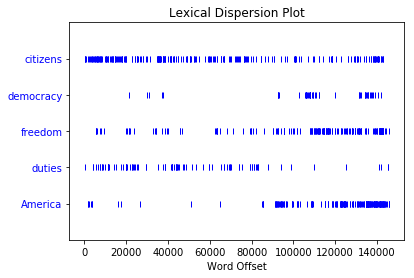

In [6]:
text1.concordance("former")  #会显示20个包含former的语句上下文
print('------------------------------------------------------------')
text1.similar("ship")     #搜索相关词
print('------------------------------------------------------------')
# 查看某个词在文章里出现的位置
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"]) 

260819
9754
1403
['Herman', 'Melville', ']', 'ETYMOLOGY', 'Late', 'Consumptive', 'School', 'threadbare', 'lexicons', 'mockingly']
Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand
None


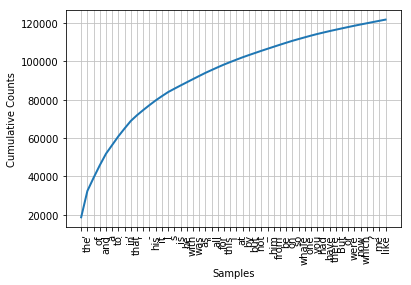

In [27]:
##### 词统计
#print(set(text1)) #：返回文本的所有词集合
print(len(text1)) #：返回总字数
print(len(set(text4))) #：返回文本总词数
print(text4.count("is")) #：返回“is”这个词出现的总次数

#好像缺加载什么东西
fdist1 = nltk.FreqDist(text1)
print(fdist1.hapaxes()[0:10]) #：返回只出现一次的词
print(text1.collocations()) #：频繁的双联词(bigrams)一个搭配是异乎寻常的经常在一起出现的词序列例子
fdist1 = FreqDist(text1)    #：统计文章的词频并按从大到小排序存到一个列表里
fdist1.plot(50, cumulative=True) #：统计词频，并输出累计图像

### 2.2 NLTK语料库

from nltk.corpus import webtext：网络文本语料库，网络和聊天文本  
from nltk.corpus import brown：布朗语料库，按照文本分类好的500个不同来源的文本  
from nltk.corpus import reuters：路透社语料库，1万多个新闻文档  
from nltk.corpus import inaugural：就职演说语料库，55个总统的演说  

nltk.corpus.gutenberg就是gutenberg语料库的阅读器.

语料库的通用接口:     
fileids()：返回语料库中的文件   
categories()：返回语料库中的分类  
raw()：返回语料库的原始内容  
words()：返回语料库中的词汇  
sents()：返回语料库句子  
abspath()：指定文件在磁盘上的位置  
open()：打开语料库的文件流  

词汇列表语料库：nltk.corpus.words.words()，所有英文单词，这个可以用来识别语法错误  
停用词语料库：nltk.corpus.stopwords.words，用来识别那些最频繁出现的没有意义的词  
发音词典：nltk.corpus.cmudict.dict()，用来输出每个英文单词的发音  
比较词表：nltk.corpus.swadesh，多种语言核心200多个词的对照，可以作为语言翻译的基础  
同义词集：WordNet，面向语义的英语词典，由同义词集组成，并组织成一个网络   

In [9]:
print(nltk.corpus.gutenberg.fileids())  #返回Gutenberg语料库的文件标识符
print('------------------------------------------------------------')
#print(nltk.corpus.gutenberg.raw('chesterton-brown.txt'))   #：输出chesterton-brown.txt文章的原始内容
print(nltk.corpus.gutenberg.words('chesterton-brown.txt')) #：输出chesterton-brown.txt文章的单词列表
print('------------------------------------------------------------')
print(nltk.corpus.gutenberg.sents('chesterton-brown.txt')) #：输出chesterton-brown.txt文章的句子列表

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']
------------------------------------------------------------
['[', 'The', 'Wisdom', 'of', 'Father', 'Brown', 'by', ...]
------------------------------------------------------------
[['[', 'The', 'Wisdom', 'of', 'Father', 'Brown', 'by', 'G', '.', 'K', '.', 'Chesterton', '1914', ']'], ['I', '.'], ...]


##### 加载自己的语料库


In [10]:
from nltk.corpus import PlaintextCorpusReader
wordlists = PlaintextCorpusReader('eipi10/ml', '.*\.py')
print(wordlists.fileids())
print('------------------------------------------------------------')
print(wordlists.words())

['ObjectExample.py', '__init__.py', 'model.py', 'neural_network.py', 'planar_utils.py', 'regression_model.py', 'utils.py']
------------------------------------------------------------
['class', 'Parent', ':', 'parentAttr', '=', '100', ...]


##### 条件分布概率


['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


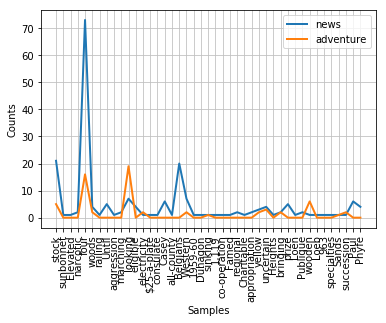

In [11]:
import sys
from nltk.corpus import brown

# 链表推导式，genre是brown语料库里的所有类别列表，word是这个类别中的词汇列表
# (genre, word)就是类别加词汇对
genre_word = [(genre, word)
        for genre in brown.categories()
        for word in brown.words(categories=genre)
        ]
print(brown.categories())
# 创建条件频率分布
cfd = nltk.ConditionalFreqDist(genre_word)

# 指定条件和样本作图
cfd.plot(conditions=['news','adventure'], 
         samples=[u'stock', u'sunbonnet', u'Elevated', u'narcotic', u'four', 
                  u'woods', u'railing', u'Until', u'aggression', u'marching', 
                  u'looking', u'eligible', u'electricity', u'$25-a-plate', 
                  u'consulate', u'Casey', u'all-county', u'Belgians', 
                  u'Western', u'1959-60', u'Duhagon', u'sinking', 
                  u'1,119', u'co-operation', u'Famed', u'regional', 
                  u'Charitable', u'appropriation', u'yellow', u'uncertain', 
                  u'Heights', u'bringing', u'prize', u'Loen', u'Publique', 
                  u'wooden', u'Loeb', u'963', u'specialties', u'Sands', 
                  u'succession', u'Paul', u'Phyfe'])

In [12]:
# 循环10次，从cfdist中取当前单词最大概率的连词,并打印出来
def generate_model(cfdist, word, num=10):
    for i in range(num):
        print(word)
        word = cfdist[word].max()

# 加载语料库
text = nltk.corpus.genesis.words('english-kjv.txt')

# 生成双连词
bigrams = nltk.bigrams(text)

# 生成条件频率分布
cfd = nltk.ConditionalFreqDist(bigrams)

# 以the开头，生成随机串
generate_model(cfd, 'the')

the
land
of
the
land
of
the
land
of
the


### 2.3 词性标注
#### 英文词干提取器

In [13]:
porter = nltk.PorterStemmer()
print(porter.stem('lying'))
print(porter.stem('books'))
print(porter.stem('boxes'))
print(porter.stem('fixed'))

lie
book
box
fix


#### 词性标注器

其中CC是连接词，RB是副词，IN是介词，NN是名次，JJ是形容词

In [14]:
text = nltk.word_tokenize("And now for something completely different")
print(text)
print(nltk.pos_tag(text))
print(nltk.pos_tag(['i','love','you']))     #这是love是动词
print(nltk.pos_tag(['love','and','hate']))  #这是love是名词

['And', 'now', 'for', 'something', 'completely', 'different']
[('And', 'CC'), ('now', 'RB'), ('for', 'IN'), ('something', 'NN'), ('completely', 'RB'), ('different', 'JJ')]
[('i', 'NN'), ('love', 'VBP'), ('you', 'PRP')]
[('love', 'NN'), ('and', 'CC'), ('hate', 'NN')]


In [15]:
#自己标注一批语料库
#这里的nltk.tag.str2tuple可以把fly/NN这种字符串转成一个二元组
tagged_token = nltk.tag.str2tuple('fly/NN') 
print(tagged_token)

sent = '我/NN 是/IN 一个/AT 大/JJ 傻×/NN'
print([nltk.tag.str2tuple(t) for t in sent.split()])

('fly', 'NN')
[('我', 'NN'), ('是', 'IN'), ('一个', 'AT'), ('大', 'JJ'), ('傻×', 'NN')]


In [16]:
#看一下布朗语料库中的标注
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

##### 词性自动标注
面对一片新的语料库(比如我们从未处理过中文，只有一批批的中文语料，现在让我们做词性自动标注), 几种标注方法:
- 默认标注器  
不管什么词，都标注为频率最高的一种词性。比如经过分析，所有中文语料里的词是名次的概率是13%最大，那么我们的默认标注器就全部标注为名次。
- 正则表达式标注器  
满足特定正则表达式的认为是某种词性，比如凡是带“们”的都认为是代词(PRO)。正则表达式标注器通RegexpTagge实现，
- 查询标注器 
找出最频繁的n个词以及它的词性，然后用这个信息去查找语料库，匹配的就标记上，剩余的词使用默认标注器(回退)。这一般使用一元标注的方式. 二元标注和多元标注：一元标注指的是只考虑当前这个词，不考虑上下文。二元标注器指的是考虑它前面的词的标注，用法只需要把上面的UnigramTagger换成BigramTagger。同理三元标注换成TrigramTagger
- 组合标注器  
为了提高精度和覆盖率，我们对多种标注器组合，比如组合二元标注器、一元标注器和默认标注器。

In [17]:
# 默认标注器
default_tagger = nltk.DefaultTagger('NN')
raw = '我 累 个 去'
tokens = nltk.word_tokenize(raw)
tags = default_tagger.tag(tokens)
print(tags)

# 正则表达式标注器
pattern = [(r'.*们$','PRO')]
tagger = nltk.RegexpTagger(pattern)   #没有匹配的词的词性是None
print(tagger.tag(nltk.word_tokenize('我们 累 个 去 你们 和 他们 啊')))

# 查询标注器
tagged_sents = [[(u'我', u'PRO'), (u'我们', u'PRO'),(u'你们', u'PRO'), (u'小兔', u'NN')]]
unigram_tagger = nltk.UnigramTagger(tagged_sents)
sents = [[u'我', u'你', u'小兔']]
tags = unigram_tagger.tag(sents[0])
print(tags)

# 组合标注器
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(tagged_sents, backoff=t0) 
# t2 = nltk.BigramTagger(train_sents, backoff=t1) 
tags = t1.tag(nltk.word_tokenize('我们 累 个 去 你们 和 他们 啊'))
print(tags)

[('我', 'NN'), ('累', 'NN'), ('个', 'NN'), ('去', 'NN')]
[('我们', 'PRO'), ('累', None), ('个', None), ('去', None), ('你们', 'PRO'), ('和', None), ('他们', 'PRO'), ('啊', None)]
[('我', 'PRO'), ('你', None), ('小兔', 'NN')]
[('我们', 'PRO'), ('累', 'NN'), ('个', 'NN'), ('去', 'NN'), ('你们', 'PRO'), ('和', 'NN'), ('他们', 'NN'), ('啊', 'NN')]


##### 标注器的存储和加载

In [18]:

from _pickle import dump, load
output = open('t1.pkl', 'wb')
dump(t1, output, -1)
output.close()

input = open('t1.pkl', 'rb') 
tagger = load(input) 
input.close() 
tags = t1.tag(nltk.word_tokenize('我们 累 个 去 你们 和 他们 啊'))
print(tags)

[('我们', 'PRO'), ('累', 'NN'), ('个', 'NN'), ('去', 'NN'), ('你们', 'PRO'), ('和', 'NN'), ('他们', 'NN'), ('啊', 'NN')]


#####  中文词性标注

几大中文的NLP工具

-  哈工大的LTP(语言技术平台)：它可以做中文分词、词性标注、命名实体识别、依存句法分析、语义角色标注等丰富、 高效、精准的自然语言处理技术

- 博森科技了： 除了做中文分词、词性标注、命名实体识别、依存文法之外还可以做情感分析、关键词提取、新闻分类、语义联想、时间转换、新闻摘要等，但因为是商业化的公司，除了分词和词性标注免费之外全都收费

- jieba分词： 这个开源小工具分词和词性标注做的挺不错的，但是其他方面还欠缺一下，如果只是中文分词的需求完全可以满足

- 中科院张华平博士的NLPIR汉语分词系统： 能支持关键词提取

pip install -U pynlpir --proxy http://web-proxy.rose.hp.com:8080

In [51]:
    #不能运行
# import pynlpir

# pynlpir.open()
# s = '聊天机器人到底该怎么做呢？'
# segments = pynlpir.segment(s)
# for segment in segments:
#     print(segment[0], '\t', segment[1])


# key_words = pynlpir.get_key_words(s, weighted=True)
# for key_word in key_words:
#     print key_word[0], '\t', key_word[1]

# s = '海洋是如何形成的'
# segments = pynlpir.segment(s, pos_names='all')

# pynlpir.close()

RuntimeError: NLPIR function 'NLPIR_Init' failed.

## 3.  文档分类

可以采用贝叶斯分类器

In [40]:
from nltk.corpus import movie_reviews
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words.keys())[:2000]
def document_features(document): 
    for word in word_features: 
        features['contains(%s)' % word] = (word in document_words) 
    return features 

In [41]:
# featuresets = [(document_features(d), c) for (d,c) in documents]
# classifier = nltk.NaiveBayesClassifier.train(featuresets)
# classifier.classify(document_features(d))
# classifier.show_most_informative_features(5)

## 4. 语法分析和文法分析

人脑在理解一句话的时候也暗暗地在做着由非结构化到结构化的工作。

比如说：“我下午要和小明在公司讨论一个技术问题”。这是一片非结构化的词语拼成的一句话，但是这里面有很多隐含信息：

1）小明是一个实体

2）参与者有两个：我和小明

3）地点设定是：公司

4）要做的事情是：讨论

5）讨论的内容是：问题

6）这个问题是一个技术问题

7）公司是一个地点

8）讨论是一种行为

9）我和小明有某种关系

10）下午是一个时间

### 分块

分块就是根据句子中的词和词性，按照某种规则组合在一起形成一个个分块，每个分块代表一个实体。常见的实体包括：组织、人员、地点、日期、时间等

以上面的例子为例，首先我们做名词短语分块（NP-chunking），比如：技术问题。名词短语分块通过词性标记和一些规则就可以识别出来，也可以通过机器学习的方法识别

除了名词短语分块还有很多其他分块：介词短语（PP，比如：以我……）、动词短语（VP，比如：打人）、句子（S，我是人）

### 语法分析

可以采用IOB标记，I(inside，内部)、O(outside，外部)、B(begin, 开始)，一个块的开始标记为B，块内的标识符序列标注为I，所有其他标识符标注为O

也可以用树结构来存储分块，用树结构可以解决IOB无法标注的另一类分块，那就是多级分块。多级分块就是一句话可以有多重分块方法，比如：我以我的最高权利惩罚你。这里面“最高权利”、“我的最高权利”、“以我的最高权利”是不同类型分块形成一种多级分块，这是无法通过IOB标记的，但是用树结构可以。这也叫做级联分块。具体树结构举个例子：

$
(S   \\
\ \ \ \    (NP\ 小明) \\
\ \ \ \     (VP \\
\ \ \ \ \ \ \ \        (V\ 追赶)  \\
\ \ \ \ \ \ \ \        (NP \\
\ \ \ \ \ \ \ \ \ \ \ \             (Det\ 一只)  \\
\ \ \ \ \ \ \ \ \ \ \ \             (N \ 兔子)))) \\
$

这里面的N表示名词，Det表示限定词，NP表示名词短语，V表示动词，VP表示动词短语，S表示句子. 这种句子分析方法叫做语法分析

In [31]:
from nltk.corpus import conll2000
print(conll2000.chunked_sents('train.txt')[99])

(S
  (PP Over/IN)
  (NP a/DT cup/NN)
  (PP of/IN)
  (NP coffee/NN)
  ,/,
  (NP Mr./NNP Stone/NNP)
  (VP told/VBD)
  (NP his/PRP$ story/NN)
  ./.)


### 文法分析
因为句子可以无限组合无限扩展，所以单纯用语法分析来完成自然语言处理这件事情是不可能的，所以出现了文法分析

文法是一个潜在的无限的句子集合的一个紧凑的特性，它是通过一组形式化模型来表示的，文法可以覆盖所有结构的句子，对一个句子做文法分析，就是把句子往文法模型上靠，如果同时符合多种文法，那就是有歧义的句子

最重要的结论：文法结构范围相当广泛，无法用规则类的方法来处理，只有利用基于特征的方法才能处理

文法特征举例：单词最后一个字母、词性标签、文法类别、正字拼写、指示物、关系、施事角色、受事角色

#### 文法特征结构
因为文法特征是一种kv，所以特征结构的存储形式是字典

不是什么样的句子都能提取出每一个文法特征的，需要满足一定的条件，这需要通过一系列的检查手段来达到，包括：句法协议（比如this dog就是对的，而these dog就是错的）、属性和约束、术语

#### 特征结构的处理

In [32]:
fs1 = nltk.FeatStruct(TENSE='past', NUM='sg')
print(fs1)
fs2 = nltk.FeatStruct(POS='N', AGR=fs1)
print(fs2)

[ NUM   = 'sg'   ]
[ TENSE = 'past' ]
[ AGR = [ NUM   = 'sg'   ] ]
[       [ TENSE = 'past' ] ]
[                          ]
[ POS = 'N'                ]


在nltk的库里已经有了一些产生式文法描述可以直接使用，位置在：

ls ~/nltk_data/grammars/book_grammars

我们看其中最简单的一个sql0.fcfg，这是一个查找国家城市的sql语句的文法：

% start S

S[SEM=(?np + WHERE + ?vp)] -> NP[SEM=?np] VP[SEM=?vp]

VP[SEM=(?v + ?pp)] -> IV[SEM=?v] PP[SEM=?pp]
VP[SEM=(?v + ?ap)] -> IV[SEM=?v] AP[SEM=?ap]
NP[SEM=(?det + ?n)] -> Det[SEM=?det] N[SEM=?n]
PP[SEM=(?p + ?np)] -> P[SEM=?p] NP[SEM=?np]
AP[SEM=?pp] -> A[SEM=?a] PP[SEM=?pp]

NP[SEM='Country="greece"'] -> 'Greece'
NP[SEM='Country="china"'] -> 'China'

Det[SEM='SELECT'] -> 'Which' | 'What'

N[SEM='City FROM city_table'] -> 'cities'

IV[SEM=''] -> 'are'
A[SEM=''] -> 'located'
P[SEM=''] -> 'in'

In [36]:
import nltk
from nltk import load_parser
cp = load_parser('grammars/book_grammars/sql0.fcfg')
query = 'What cities are located in China'
tokens = query.split()
for tree in cp.parse(tokens):
    print(tree)

(S[SEM=(SELECT, City FROM city_table, WHERE, , , Country="china")]
  (NP[SEM=(SELECT, City FROM city_table)]
    (Det[SEM='SELECT'] What)
    (N[SEM='City FROM city_table'] cities))
  (VP[SEM=(, , Country="china")]
    (IV[SEM=''] are)
    (AP[SEM=(, Country="china")]
      (A[SEM=''] located)
      (PP[SEM=(, Country="china")]
        (P[SEM=''] in)
        (NP[SEM='Country="china"'] China)))))


## 5. 聊天机器人

三大模块：

- 提问处理模块
    - 查询关键词生成
    - 答案类型确定
    - 句法和语义分析。
- 检索模块
- 答案抽取模块

关键技术：

- 海量文本知识表示：网络文本资源获取、机器学习方法、大规模语义计算和推理、知识表示体系、知识库构建；

- 问句解析：中文分词、词性标注、实体标注、概念类别标注、句法分析、语义分析、逻辑结构标注、指代消解、关联关系标注、问句分类（简单问句还是复杂问句、实体型还是段落型还是篇章级问题）、答案类别确定；

- 答案生成与过滤：候选答案抽取、关系推演（并列关系还是递进关系还是因果关系）、吻合程度判断、噪声过滤

技术分类： 

- 基于检索的技术： 简单易实现，无法从句法关系和语义关系给出答案，也就是搞不定推理问题
- 基于模式匹配的技术：把问题往已经梳理好的几种模式上去靠，这种做推理简单，但是模式我们涵盖不全
- 基于自然语言理解的技术：把浅层分析加上句法分析、语义分析都融入进来做的补充和改进
- 基于统计翻译模型的技术：把问句里的疑问词留出来，然后和候选答案资料做配对，能对齐了就是答案



### 中文分词
#### jieba

pip install -U jieba --proxy http://web-proxy.rose.hp.com:8080

In [19]:
import jieba
seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print("Full Mode:" + "/ ".join(seg_list))
seg_list = jieba.cut("我来到北京清华大学", cut_all=False)
print("Extract Mode:" + "/ ".join(seg_list))
seg_list = jieba.cut("他来到了网易杭研大厦")   #默认是精确模式
print("/ ".join(seg_list))
seg_list = jieba.cut_for_search("小明硕士毕业于中国科学院计算所，后在日本京都大学深造"                               )
print("/ ".join(seg_list)) #搜索引擎模式，范围最大，一般和全模式结果基本相同。

Full Mode:我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学
Full Mode:我/ 来到/ 北京/ 清华大学
他/ 来到/ 了/ 网易/ 杭研/ 大厦
小明/ 硕士/ 毕业/ 于/ 中国/ 科学/ 学院/ 科学院/ 中国科学院/ 计算/ 计算所/ ，/ 后/ 在/ 日本/ 京都/ 大学/ 日本京都大学/ 深造


- 采用正则表达式去掉一些特殊的词
    - 比如网上的表情符号，@某人，网易，邮箱等。
- 词形归一化  
    纷繁复杂的词形
        - 时态
        - 单复数
        - 衍生词 nation => national => nationalize
    - Stemming(词干提取)
        - walking = walk
        - walked = walk
    - Lemmatization(词性归一)
        - went, gone = go
        - are, is - be
    - POS(Part Of Speech) Tag  
- Stopwords(虚词表)    
    - THE， HE

<img align="left" src="image/text_processing.png">


###  Word2Vec
- onehot
- 找到最近词曲线的频次
- CBow
- Skip-Gram

### SVD

奇异值分解用于降维

### TF-IDF

- TF-IDF 公式
- TF-IDF 优点和缺点

### Auto-Encoder

用于压缩输入的数据。早期应用深度学习思维的思想，目前效果已经一般了。

词意理解：中国队大胜美国队；中国队大败美国队。“胜”、“败”一对反义词，却表达同样的意思：中国赢了，美国输了。这需要机器能够自动分析出谁胜谁负

自动生成语言：自动生成语言基于语言的自动理解，不理解就无法自动生成

机器翻译：现在机器翻译已经很多了，但是还很难达到最佳，比如我们把中文翻译成英文，再翻译成中文，再翻译成英文，来回10轮，发现和最初差别还是非常大的。

人机对话：这也是我们想做到的最终目标，这里有一个叫做“图灵测试”的方式，也就是在5分钟之内回答提出问题的30%即通过，能通过则认为有智能了。

自然语言处理分两派，一派是基于规则的，也就是完全从语法句法等出发，按照语言的规则来分析和处理，这在上个世纪经历了很多年的试验宣告失败，因为规则太多太多，而且很多语言都不按套路出牌，想象你追赶你的影子，你跑的快他跑的更快，你永远都追不上它。另一派是基于统计的，也就是收集大量的语料数据，通过统计学习的方式来理解语言，这在当代越来越受重视而且已经成为趋势，因为随着硬件技术的发展，大数据存储和计算已经不是问题，无论有什么样的规则，语言都是有统计规律的，当然基于统计也存在缺陷，那就是“小概率事件总是不会发生的”导致总有一些问题解决不了。